# Introduction to Python
This is an introduction to data analysis using a database of diabetes cases among the Pima Indian population near Phoenix, Arizona. The database was compiled by the National Institute of Diabetes and Digestive and Kidney Diseases and subsequently used in a 1988 study\[1\] to predict the onset of diabetes. This notebook is a practical demonstration of Python's [Pandas Data Analysis Library](http://pandas.pydata.org/), which provides powerful data structures for manipulating and analyzing data. We'll be using this to re-visit a classic machine learning example using the [Sci-Kit Learn](http://scikit-learn.org/stable/) library. In addition to Pandas, [Numpy](http://www.numpy.org/) is an essential Python library for scientific computing that provides a powerful array object, tools for integrating C/C++ and Fortan code, linear algebra tools, etc.



[1] [Smith, J. W., Everhart, J. E., Dickson, W. C., Knowler, W. C., Johannes, R. S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In *Proceedings of the Symposium on Computer Applications and Medical Care* (pp. 261-265). IEEE Computer Society Press](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf)


Let's begin by importing Pandas and Numpy.

In [1]:
import pandas as pd
import numpy as np

Now let's set some display parameters for Pandas.

In [2]:
pd.set_option('max_rows', 10)
pd.set_option('max_columns', 30)

Next, we'll read database from UCI's Information and Computing Services archive. Note that since the data does not contain headers, we must provide them manually.

In [3]:
column_names=['npreg','glu', 'bp','skin','serum', 'bmi', 'ped', 'age', 'class']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data', header=None, names=column_names)

In [4]:
df

,npreg,glu,bp,skin,serum,bmi,ped,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Now we can visualize some statistics on our data. First, let's import our plotting library.

In [5]:
import matplotlib.pyplot as plt

For example, let's see the distribution of ages.

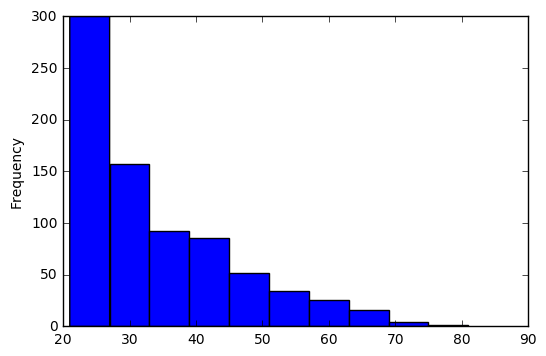

In [6]:
df['age'].plot(kind="hist")
plt.show()

How well does the "not-yet-tested" pedigree function do when compared to actual cases? We can prepare a boxplot to compare cases with and without diabetes.

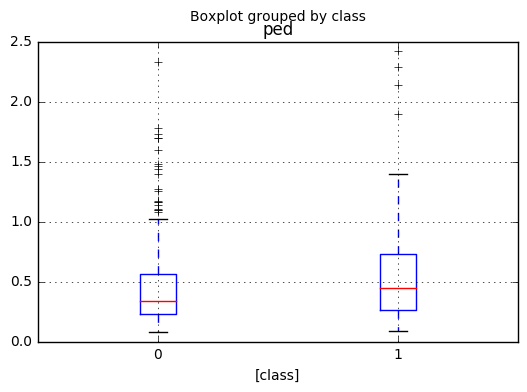

In [7]:
df.boxplot(column=['ped'], by=['class'])
plt.show()

The positive cases have a higher median and higher outliers, so it looks like the pedigree function does what it set out to do. 

In [8]:
# slicing ranges by labels
df.loc[20:40,'skin':'ped']

,skin,serum,bmi,ped
20,41,235,39.3,0.704
21,0,0,35.4,0.388
22,0,0,39.8,0.451
23,35,0,29.0,0.263
24,33,146,36.6,0.254
...,...,...,...,...
36,0,0,33.2,0.420
37,37,0,32.9,0.665
38,42,0,38.2,0.503
39,47,207,37.1,1.390


In [9]:
# same as before, using indices
df.ix[20:40, 3:6]

,skin,serum,bmi
20,41,235,39.3
21,0,0,35.4
22,0,0,39.8
23,35,0,29.0
24,33,146,36.6
...,...,...,...
36,0,0,33.2
37,37,0,32.9
38,42,0,38.2
39,47,207,37.1


In [10]:
# adding a column
df['new_col'] = df['skin'] / df['bmi']
df

,npreg,glu,bp,skin,serum,bmi,ped,age,class,new_col
0,6,148,72,35,0,33.6,0.627,50,1,1.041667
1,1,85,66,29,0,26.6,0.351,31,0,1.090226
2,8,183,64,0,0,23.3,0.672,32,1,0.000000
3,1,89,66,23,94,28.1,0.167,21,0,0.818505
4,0,137,40,35,168,43.1,2.288,33,1,0.812065
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.458967
764,2,122,70,27,0,36.8,0.340,27,0,0.733696
765,5,121,72,23,112,26.2,0.245,30,0,0.877863
766,1,126,60,0,0,30.1,0.349,47,1,0.000000


In [11]:
# removing column
del df['new_col']
df

,npreg,glu,bp,skin,serum,bmi,ped,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Now that the data has been loaded into our Python environment, we can begin exploring. Let's use a logistic regression model with a feature extraction algorithm called Recursive Feature Elimination (RFE) provided by the Sci-Kit Learn library. First, we'll need to import the relevant parts of the library.

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [13]:
# Feature Extraction with RFE

# returns a dataframe view with only input variables (ignore class labels)
df.loc[:,'npreg':'age']

# returns an array of the same input variables
X = df.loc[:,'npreg':'age'].values

# store labels separately
Y = df.loc[:,'class'].values


# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

# print results
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


The RFE algorithm recursively fits a model (logistic regression in this case) using weighted coefficients on each of the features. The features are then ranked according to their weight. In this case, we see that the highest-ranked features that fit the diabetes model are number of pregnancies (npreg), the diabetes pedigree index (ped), and age. Let's select only those features then.

In [14]:
# boolean selection
data = df.loc[:,(fit.ranking_==1)]
data

,npreg,bmi,ped
0,6,33.6,0.627
1,1,26.6,0.351
2,8,23.3,0.672
3,1,28.1,0.167
4,0,43.1,2.288
...,...,...,...
763,10,32.9,0.171
764,2,36.8,0.340
765,5,26.2,0.245
766,1,30.1,0.349


We can also split the data set into positive and negative cases of diabetes.

In [15]:
# splitting data into positive and negative diabetes classes
df_pos = df[ (df['class'] == 1) ]
df_neg = df[ (df['class'] == 0) ]

In [16]:
df_pos

,npreg,glu,bp,skin,serum,bmi,ped,age,class
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [17]:
df_neg

,npreg,glu,bp,skin,serum,bmi,ped,age,class
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


Now we can visualize the negative and positive cases in a 3-D feature space with the highest-ranked features. But first, let's import the necessary plotting libraries.

In [18]:
from mpl_toolkits.mplot3d import Axes3D

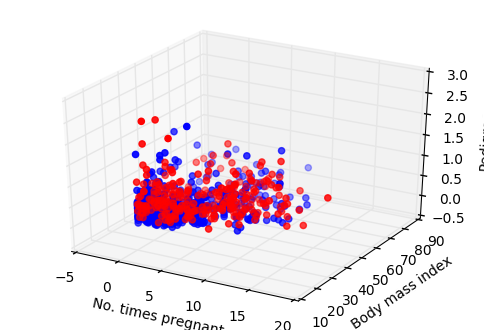

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pos['npreg'], df_pos['age'], df_pos['ped'], color='red')
ax.scatter(df_neg['npreg'], df_neg['age'], df_neg['ped'], color='blue')
ax.set_xlabel('No. times pregnant')
ax.set_ylabel('Body mass index')
ax.set_zlabel('Pedigree')
plt.show()

Our goal is to be able to tell apart the positive cases (red) from the negative (blue) ones. Despite discovering the highest-ranked features, there doesn't seem to be an intuitive decision rule that separate these. One option is to use multi-layered neural networks, which can learn complex, non-linear relationships in the data. First, we'll need to split our data set into a training set and a testing set.

In [20]:
# designate training set by randomly sampling cases
df_train = df.sample(576)

# let remaining samples be testing set
df_test = df[ ~df.index.isin(df_train.index) ]

In [21]:
df_train

,npreg,glu,bp,skin,serum,bmi,ped,age,class
215,12,151,70,40,271,41.8,0.742,38,1
620,2,112,86,42,160,38.4,0.246,28,0
216,5,109,62,41,129,35.8,0.514,25,1
154,8,188,78,0,0,47.9,0.137,43,1
34,10,122,78,31,0,27.6,0.512,45,0
...,...,...,...,...,...,...,...,...,...
7,10,115,0,0,0,35.3,0.134,29,0
22,7,196,90,0,0,39.8,0.451,41,1
699,4,118,70,0,0,44.5,0.904,26,0
217,6,125,68,30,120,30.0,0.464,32,0


In [22]:
df_test

,npreg,glu,bp,skin,serum,bmi,ped,age,class
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
761,9,170,74,31,0,44.0,0.403,43,1


In [23]:
# standardize data scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# important: keep training and testing data separated!
scaler.fit( df_test.loc[:,'npreg':'age'] )
data_test = scaler.transform(df_test.loc[:,'npreg':'age'])

scaler.fit( df_train.loc[:,'npreg':'age'] )
data_train = scaler.transform(df_train.loc[:,'npreg':'age'])

In [24]:
data_train.shape

(576, 8)

In [25]:
data_test.shape

(192, 8)

Now that we have a training set and a testing set, we can bulid a neural network and use the training data to create a classifier. Let's import the relevant part of the library.

Note: I had to install the neural_network module separately since it's not included as a core Python library. Running this in the command line should do the trick:
```
$ pip install scikit-neuralnetwork
$ conda update scikit-learn
```

In [26]:
from sklearn.neural_network import MLPClassifier


Now we can build the neural network.

In [27]:
# build neural network
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [28]:
# train neural network
clf.fit(data_train, df_train['class'])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [29]:
# predict diabetes cases on "unseen" data
clf.predict(data_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1])

In [30]:
clf.score(data_test, df_test['class'])

0.71354166666666663

In other words, this is the percentage of correctly predicted diabetes cases that the neural network was able to report with data it had never seen before.